In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from fairdata import FairData

In [2]:
df_raw = pd.read_csv('data/Cashe_information.csv')
df_raw


,customer_id,loan_request_id,loan_amount,def_flag,AGE,salary,referal,referer,connections,apps,...,highschool,college,googleplus_status,sales,dating,ios,travel_app,finsavy_app,socialconnect_app,mloan_app
0,320.0,16.0,30000.0,0.0,34.0466,85449.0,0.0,0.0,25.0,NaN,...,1.0,0.0,0.0,0.0,0.0,1,1,0,0,0
1,301.0,18.0,10000.0,0.0,45.2301,42603.0,0.0,1.0,1050.0,56.0,...,1.0,0.0,0.0,0.0,0.0,0,1,1,1,0
2,302.0,20.0,20000.0,0.0,53.7123,44783.0,0.0,0.0,NaN,35.0,...,1.0,0.0,0.0,0.0,0.0,0,1,0,1,0
3,286.0,21.0,5000.0,0.0,43.3644,38500.0,0.0,0.0,186.0,22.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0
4,302.0,19.0,20000.0,0.0,53.7123,44783.0,0.0,0.0,NaN,35.0,...,1.0,0.0,0.0,0.0,0.0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417670,549179.0,NaN,25000.0,NaN,47.5616,25000.0,NaN,NaN,4290.0,49.0,...,0.0,0.0,NaN,NaN,NaN,0,0,0,0,0
417671,1984639.0,NaN,11000.0,NaN,40.5452,27000.0,0.0,0.0,NaN,62.0,...,1.0,0.0,1.0,NaN,NaN,0,0,0,0,0
417672,776459.0,NaN,5000.0,NaN,22.5205,15000.0,NaN,NaN,36.0,NaN,...,0.0,0.0,NaN,NaN,NaN,1,0,0,0,0
417673,1865368.0,NaN,5000.0,NaN,26.4164,25000.0,0.0,0.0,4976.0,48.0,...,1.0,0.0,0.0,NaN,NaN,0,0,0,0,0


In [4]:
vars = ['loan_amount', 'AGE', 'salary', 'referal', 'referer', 'connections', 
        'apps', 'callog', 'sms', 'contacts', 'CIBIL', 'facebook_status', 
        'linkedin_status', 'log_int', 'repeater', 'worker', 'supervisor', 
        'manager', 'primary', 'highschool', 'college', 'googleplus_status', 
        'sales', 'dating', 'ios', 'travel_app', 'finsavy_app', 
        'socialconnect_app', 'mloan_app']
while len(vars) > 0:
    raw_model = sm.Logit(df_raw.approved_dum, sm.add_constant(df_raw[vars]), missing='drop').fit(disp=False)
    p = pd.Series(raw_model.pvalues.values[1:], index=vars)      
    var = p.idxmax()
    if p[var] > 0.05:
        vars.remove(var)
    else:
        break
print(vars)
raw_model.summary()

C:\Users\haoyu\Anaconda3\envs\py38\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\haoyu\Anaconda3\envs\py38\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\haoyu\Anaconda3\envs\py38\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\haoyu\Anaconda3\envs\py38\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\haoyu\Anaconda3\envs\py38\lib\site-packages\sta

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           approved_dum   No. Observations:               199105
Model:                          Logit   Df Residuals:                   199094
Method:                           MLE   Df Model:                           10
Date:                Mon, 24 Aug 2020   Pseudo R-squ.:                 0.09738
Time:                        16:31:42   Log-Likelihood:                -10259.
converged:                       True   LL-Null:                       -11365.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.1609      0.162      7.164      0.000       0.843       1.478
AGE             0.0155      0.005      3.415      0.001       0.007       0.024
salary       3.628e-06   1.15e-06      3.163      0.002    1.38e-06    5.88e-06
referer         0.1530      0.052      2.946      0.003       0.051       0.255
connections     0.0001    4.2e-05      3.287      0.001    5.58e-05       0.000
CIBIL           0.0005      0.000      4.157      0.000       0.000       0.001
log_int         1.9547      0.049     39.814      0.000       1.858       2.051
sales          -0.1774      0.056     -3.150      0.002      -0.288      -0.067
ios             0.1874      0.081      2.306      0.021       0.028       0.347
travel_app      0.2039      0.051      4.015      0.000       0.104       0.303
mloan_app       0.1033      0.047      2.187      0.029       0.011       0.196
===============================================================================
"""

In [3]:
vars = ['AGE', 'loan_amount',  'salary', 'referer', 'connections', 'CIBIL', 'log_int']
df_s = df_raw.loc[:, vars + ['approved_dum', 'def_flag']].dropna(subset=vars + ['approved_dum'])
df_s = df_s.loc[df_s.CIBIL > 0,]
df_s.describe()

,AGE,loan_amount,salary,referer,connections,CIBIL,log_int,approved_dum,def_flag
count,206547.000000,206547.000000,206547.000000,206547.000000,206547.000000,206547.000000,206547.000000,206547.000000,199459.000000
mean,31.951828,22021.644439,37768.107298,0.256799,513.605349,646.810953,1.433285,0.965683,0.111998
std,5.488065,21652.257554,26590.411458,0.436868,591.890704,126.943808,0.599426,0.182042,0.315365
min,18.011000,2290.000000,10000.000000,0.000000,0.000000,1.000000,0.405465,0.000000,0.000000
25%,28.046600,9000.000000,22380.000000,0.000000,100.000000,629.000000,1.098612,1.000000,0.000000
50%,31.224700,10000.000000,29638.000000,0.000000,340.000000,675.000000,1.098612,1.000000,0.000000
75%,34.947900,30000.000000,44150.000000,1.000000,718.000000,705.000000,2.014903,1.000000,0.000000
max,57.868500,300000.000000,910000.000000,1.000000,5000.000000,900.000000,3.178054,1.000000,1.000000


In [4]:
logit_model_1 = sm.Logit(df_s.approved_dum, sm.add_constant(df_s.drop(['approved_dum', 'def_flag'], axis=1))).fit()
logit_model_1.summary()

Optimization terminated successfully.
         Current function value: 0.123024
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           approved_dum   No. Observations:               206547
Model:                          Logit   Df Residuals:                   206539
Method:                           MLE   Df Model:                            7
Date:                Wed, 26 Aug 2020   Pseudo R-squ.:                  0.1768
Time:                        15:00:54   Log-Likelihood:                -25410.
converged:                       True   LL-Null:                       -30867.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.8515      0.089    -20.868      0.000      -2.025      -1.678
AGE             0.0312      0.003     12.244      0.000       0.026       0.036
loan_amount  1.693e-05   2.57e-06      6.583      0.000    1.19e-05     2.2e-05
salary       1.587e-05   1.09e-06     14.573      0.000    1.37e-05     1.8e-05
referer         1.3216      0.042     31.568      0.000       1.240       1.404
connections     0.0004   2.73e-05     14.886      0.000       0.000       0.000
CIBIL           0.0015   6.37e-05     23.574      0.000       0.001       0.002
log_int         1.9591      0.036     55.150      0.000       1.890       2.029
===============================================================================
"""

AGE


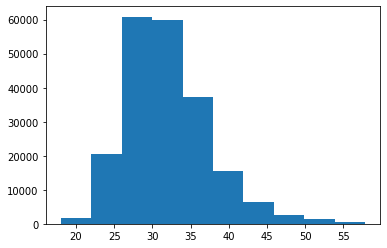

loan_amount


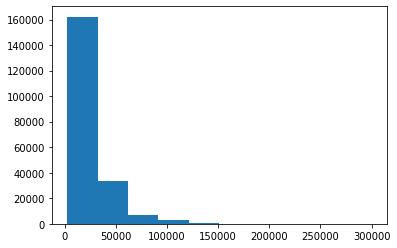

salary


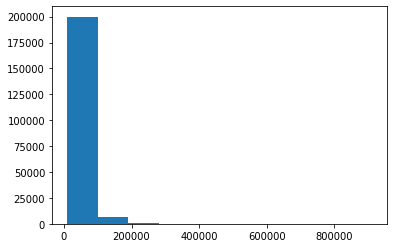

referer


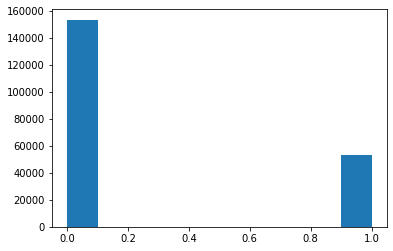

connections


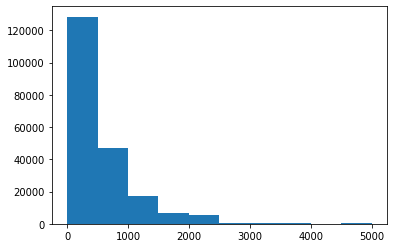

CIBIL


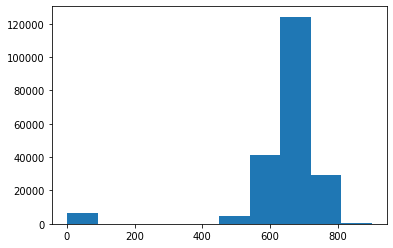

log_int


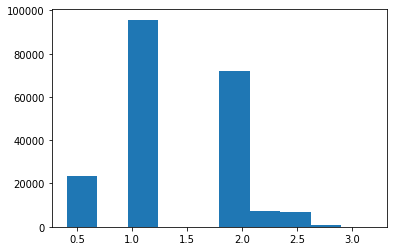

approved_dum


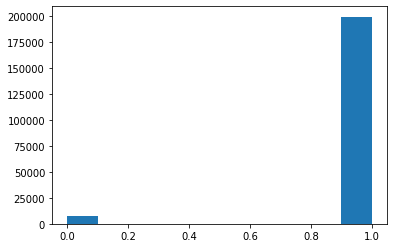

def_flag


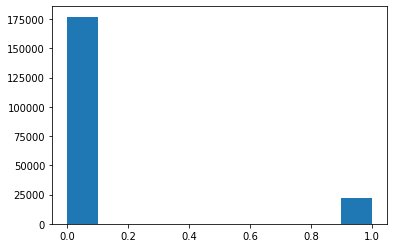

In [5]:
for c in df_s.columns:
    print(c)
    plt.hist(df_s[c])
    plt.show()

In [4]:
df = df_s[['approved_dum', 'def_flag', 'referer', 'log_int', 'CIBIL']]
log_vars = ['log_loan_amount',  'log_salary', 'log_connections']
for c in log_vars:
    df[c] = np.log(df_s[c[4:]] + 1)
norm_vars = log_vars + ['log_int', 'CIBIL']
scaler = StandardScaler().fit(df[norm_vars])
df[norm_vars] = scaler.transform(df[norm_vars])
df['age_group'] = 0
df.loc[df_s.AGE > 28, 'age_group'] = 1
df


,approved_dum,def_flag,referer,log_int,CIBIL,log_loan_amount,log_salary,log_connections,age_group
0,1.0,0.0,0.0,-1.714677,0.135407,0.805916,1.929248,-1.109320,1
1,1.0,0.0,1.0,-1.714677,-0.597202,-0.485581,0.534433,0.903045,1
3,1.0,0.0,0.0,-1.714677,-0.376632,-1.300357,0.331490,-0.036059,1
5,1.0,0.0,0.0,-1.714677,0.127530,0.329254,1.411668,0.895750,1
7,1.0,0.0,0.0,-1.714677,-0.455407,-0.008938,-0.494129,-0.185804,1
...,...,...,...,...,...,...,...,...,...
417568,0.0,NaN,0.0,-0.558323,-0.455407,-0.008938,0.553021,0.224676,1
417577,0.0,NaN,1.0,-0.558323,0.111775,-0.485581,0.196941,0.536755,1
417632,0.0,NaN,0.0,-1.714677,-0.030021,-1.300357,0.140485,0.899931,1
417645,0.0,NaN,0.0,-0.558323,0.505651,-1.300357,-0.700911,-0.174432,1


In [7]:
logit_model_2 = sm.Logit(df.approved_dum, sm.add_constant(df.drop(['approved_dum', 'def_flag'], axis=1))).fit()
logit_model_2.summary()

Optimization terminated successfully.
         Current function value: 0.121947
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           approved_dum   No. Observations:               206547
Model:                          Logit   Df Residuals:                   206539
Method:                           MLE   Df Model:                            7
Date:                Tue, 25 Aug 2020   Pseudo R-squ.:                  0.1840
Time:                        12:05:16   Log-Likelihood:                -25188.
converged:                       True   LL-Null:                       -30867.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               3.8445      0.031    124.349      0.000       3.784       3.905
referer             1.2952      0.042     30.888      0.000       1.213       1.377
log_int             1.2938      0.021     62.415      0.000       1.253       1.334
CIBIL               0.1881      0.008     23.145      0.000       0.172       0.204
log_loan_amount    -0.1075      0.028     -3.797      0.000      -0.163      -0.052
log_salary          0.5901      0.021     28.174      0.000       0.549       0.631
log_connections     0.1908      0.012     16.099      0.000       0.168       0.214
age_group           0.2718      0.027     10.160      0.000       0.219       0.324
===================================================================================
"""

In [18]:
y = df.approved_dum.values.reshape(-1, 1)
s = df.age_group.values.reshape(-1, 1)
a = df.drop(['age_group', 'approved_dum', 'def_flag', 'referer'], axis=1).values

n_test = 10000

shuffle_idx = np.arange(y.shape[0])
np.random.shuffle(shuffle_idx)
y_train, y_test = y[shuffle_idx[n_test:]], y[shuffle_idx[:n_test]]
s_train, s_test, s_eval = s[shuffle_idx[n_test:]], s[shuffle_idx[:n_test]], np.array([0, 1] * n_test).reshape(-1, 1)
a_train, a_test, a_eval = a[shuffle_idx[n_test:]], a[shuffle_idx[:n_test]], np.repeat(a[shuffle_idx[:n_test]], 2, axis=0)

## Orthogonalization

In [29]:
df_fair_o = FairData(s_train, a_train, y_train, preprocess_method='o')
decision = df.iloc[np.repeat(shuffle_idx[:n_test], 2)].copy()
decision.age_group = s_eval
decision['y_ml'] = df_fair_o.f_ml(s_eval, a_eval)
decision['y_eo'] = df_fair_o.f_eo(a_eval)
decision['y_aa'] = df_fair_o.f_aa(s_eval, a_eval)
decision['y_1'] = df_fair_o.f_1(s_eval, a_eval)
decision['y_2'] = df_fair_o.f_2(s_eval, a_eval)
decision

,approved_dum,def_flag,referer,log_int,CIBIL,log_loan_amount,log_salary,log_connections,age_group,y_ml,y_eo,y_aa,y_1,y_2
1201,1.0,0.0,0.0,-1.714677,-0.148184,-1.300357,-0.533814,0.315687,0,0.851978,0.872105,0.918910,0.916694,0.923457
1201,1.0,0.0,0.0,-1.714677,-0.148184,-1.300357,-0.533814,0.315687,1,0.878711,0.872105,0.845875,0.842951,0.864416
113951,1.0,1.0,0.0,-0.558323,-0.352999,-0.485581,-0.818432,0.104192,0,0.948071,0.955772,0.972727,0.971783,0.970277
113951,1.0,1.0,0.0,-0.558323,-0.352999,-0.485581,-0.818432,0.104192,1,0.958299,0.955772,0.944958,0.943266,0.945208
122248,1.0,0.0,0.0,-0.558323,0.316590,-1.300357,-1.248589,-2.127525,0,0.916150,0.928246,0.955355,0.953919,0.957001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84660,1.0,0.0,0.0,-0.558323,0.253570,-0.485581,-0.533814,0.119703,1,0.968476,0.966541,0.958172,0.956811,0.958442
200748,1.0,0.0,0.0,0.970294,0.292957,0.987137,1.046285,0.582478,0,0.997668,0.998028,0.998800,0.998754,0.998176
200748,1.0,0.0,0.0,0.970294,0.292957,0.987137,1.046285,0.582478,1,0.998146,0.998028,0.997501,0.997405,0.996554
98447,1.0,0.0,1.0,0.970294,0.308713,0.591579,0.038174,0.945829,0,0.996238,0.996818,0.998063,0.997989,0.997293


In [31]:
eval_o = df_fair_o.evaluate(s_test, a_test, y_test, ['eo', 'aa', 'acc'])
pd.DataFrame(eval_o, index=['eo', 'aa', 'acc'], columns=['y_ml', 'y_ftu', 'y_eo', 'y_aa', 'y_1', 'y_2'])

,y_ml,y_ftu,y_eo,y_aa,y_1,y_2
eo,0.007221,0.00000,0.000000,0.019709,0.020096,0.017454
aa,0.023712,0.01655,0.015965,0.004202,0.004240,0.002753
acc,0.961000,0.96100,0.961000,0.961100,0.961100,0.961100


## Marginal distribution mapping

In [19]:
df_fair_m = FairData(s_train, a_train, y_train, preprocess_method='m')
decision = df.iloc[np.repeat(shuffle_idx[:n_test], 2)].copy()
decision.age_group = s_eval
decision['y_ml'] = df_fair_m.f_ml(s_eval, a_eval)
decision['y_eo'] = df_fair_m.f_eo(a_eval)
decision['y_aa'] = df_fair_m.f_aa(s_eval, a_eval)
decision['y_1'] = df_fair_m.f_1(s_eval, a_eval)
decision['y_2'] = df_fair_m.f_2(s_eval, a_eval)
decision

,approved_dum,def_flag,referer,log_int,CIBIL,log_loan_amount,log_salary,log_connections,age_group,y_ml,y_eo,y_aa,y_1,y_2
1201,1.0,0.0,0.0,-1.714677,-0.148184,-1.300357,-0.533814,0.315687,0,0.851978,0.872105,0.918910,0.935079,0.957036
1201,1.0,0.0,0.0,-1.714677,-0.148184,-1.300357,-0.533814,0.315687,1,0.878711,0.872105,0.845875,0.811397,0.894250
113951,1.0,1.0,0.0,-0.558323,-0.352999,-0.485581,-0.818432,0.104192,0,0.948071,0.955772,0.972727,0.978849,0.973501
113951,1.0,1.0,0.0,-0.558323,-0.352999,-0.485581,-0.818432,0.104192,1,0.958299,0.955772,0.944958,0.917693,0.934356
122248,1.0,0.0,0.0,-0.558323,0.316590,-1.300357,-1.248589,-2.127525,0,0.916150,0.928246,0.955355,0.969174,0.968647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84660,1.0,0.0,0.0,-0.558323,0.253570,-0.485581,-0.533814,0.119703,1,0.968476,0.966541,0.958172,0.938032,0.951472
200748,1.0,0.0,0.0,0.970294,0.292957,0.987137,1.046285,0.582478,0,0.997668,0.998028,0.998800,0.998683,0.997647
200748,1.0,0.0,0.0,0.970294,0.292957,0.987137,1.046285,0.582478,1,0.998146,0.998028,0.997501,0.995297,0.993390
98447,1.0,0.0,1.0,0.970294,0.308713,0.591579,0.038174,0.945829,0,0.996238,0.996818,0.998063,0.997665,0.995806


In [30]:
eval_m = df_fair_m.evaluate(s_test, a_test, y_test, ['eo', 'aa', 'acc'])
pd.DataFrame(eval_m, index=['eo', 'aa', 'acc'], columns=['y_ml', 'y_ftu', 'y_eo', 'y_aa', 'y_1', 'y_2'])

,y_ml,y_ftu,y_eo,y_aa,y_1,y_2
eo,0.007221,0.00000,0.000000,0.019709,0.041692,0.026673
aa,0.023712,0.01655,0.015965,0.004202,0.023426,0.013400
acc,0.961000,0.96100,0.961000,0.961100,0.961100,0.961300


In [32]:
df_fair_o.cit_parametric(summary=True)

<F test: F=array([[25761.84913579]]), p=0.0, df_denom=1.97e+05, df_num=1>


0.0

In [22]:
df_fair_m.cit_parametric(summary=True)

<F test: F=array([[29590.65872263]]), p=0.0, df_denom=1.97e+05, df_num=1>


0.0

In [48]:
def default_rate(cutoff_score_name, age_group=-1):
    d = decision.loc[((age_group == -1) | (decision.age_group == age_group)), [cutoff_score_name, 'def_flag']].sort_values(by=cutoff_score_name, ascending=False)
    d['default_not_na'] = d.def_flag.notna()
    d['default_rate'] = d.def_flag.cumsum()/d.default_not_na.cumsum()
    return d[cutoff_score_name].values, d.default_rate.values

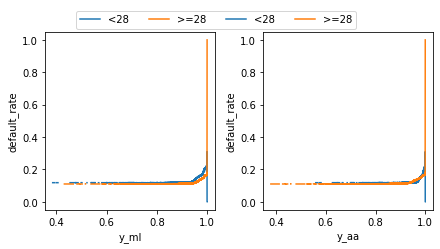

In [54]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']    
f, axes = plt.subplots(1, 2, figsize=(6,3), constrained_layout=True)

for i, score_name in enumerate(['y_ml', 'y_aa']):
    axes[i].set_xlabel(score_name)
    axes[i].set_ylabel("default_rate")
    for age_group, label in enumerate(['<28', '>=28']):
        x, y = default_rate(score_name, age_group)
        axes[i].plot(x, y, label = label, color=colors[age_group])
# 
# ax1.set_ylabel("EO-fairness")
# ax2.set_xlabel("Bias due to sex $\\beta_{s}$")
# ax2.set_ylabel("Test acc.")
f.legend(bbox_to_anchor=(0.5,1.02), loc="lower center", borderaxespad=0, ncol=6)
plt.show()